In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [ ]:
from numpy import asarray

folder = '/content/drive/MyDrive/SHARE/Colab Notebooks/Data/Face/Train/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('fong'):
    output = 0
  if file.startswith('ha'):
    output = 1
  if file.startswith('hau'):
    output = 2
  if file.startswith('huy'):
    output = 3
  if file.startswith('kiet'):
    output = 4
  if file.startswith('long'):
    output = 5
  if file.startswith('luan'):
    output = 6
  if file.startswith('phuc'):
    output = 7
  if file.startswith('thai'):
    output = 8
  if file.startswith('tung'):
    output = 9
  photo = load_img(folder + file, target_size=(40, 40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/SHARE/Colab Notebooks/Data/Face/Face_photos.npy', photos)
save('/content/drive/MyDrive/SHARE/Colab Notebooks/Data/Face/Face_labels.npy', labels)

(600, 40, 40, 3) (600,)


In [ ]:
# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/SHARE/Colab Notebooks/Data/Face/Face_photos.npy')
labels = np.load('/content/drive/MyDrive/SHARE/Colab Notebooks/Data/Face/Face_labels.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

In [ ]:
model = Sequential()
#Convolutional
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', input_shape = (40,40,3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation= 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 40, 40, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 64)       

In [ ]:
#Tang cuong data
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

In [ ]:
train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),epochs=100)
     

Epoch 1/100


<ipython-input-20-dc3ef270d980>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),epochs=100)


7/7 [==============================] - 3s 387ms/step - loss: 0.1665 - accuracy: 0.9452
Epoch 2/100
7/7 [==============================] - 4s 584ms/step - loss: 0.1249 - accuracy: 0.9619
Epoch 3/100
7/7 [==============================] - 3s 360ms/step - loss: 0.1012 - accuracy: 0.9690
Epoch 4/100
7/7 [==============================] - 3s 349ms/step - loss: 0.0933 - accuracy: 0.9595
Epoch 5/100
7/7 [==============================] - 3s 408ms/step - loss: 0.0611 - accuracy: 0.9786
Epoch 6/100
7/7 [==============================] - 3s 356ms/step - loss: 0.1239 - accuracy: 0.9667
Epoch 7/100
7/7 [==============================] - 3s 354ms/step - loss: 0.1487 - accuracy: 0.9500
Epoch 8/100
7/7 [==============================] - 3s 398ms/step - loss: 0.1186 - accuracy: 0.9595
Epoch 9/100
7/7 [==============================] - 5s 661ms/step - loss: 0.1723 - accuracy: 0.9524
Epoch 10/100
7/7 [==============================] - 5s 691ms/step - loss: 0.1256 - accuracy: 0.9667
Epoch 11/100
7/7 [===

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)


6/6 [==============================] - 0s 76ms/step - loss: 23.0204 - accuracy: 0.9778
Accuracy: 0.9777777791023254
Loss: 23.020429611206055


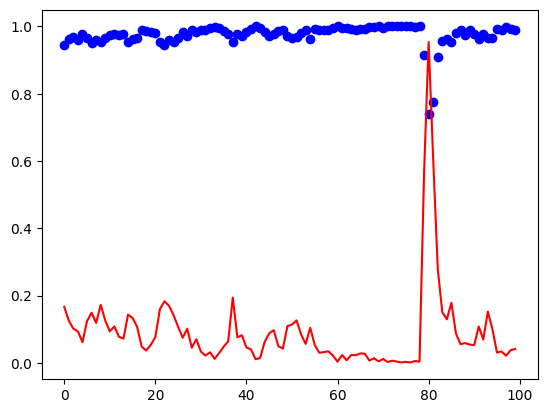

In [ ]:
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/SHARE/Colab Notebooks/Data/Face/Faceeeee.h5')

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/SHARE/Colab Notebooks/Data/Face/Faceeeee.h5')

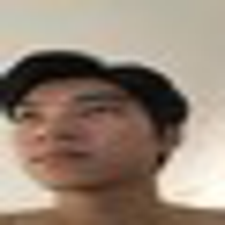

1/1 [==============================] - 0s 166ms/step
['thai']


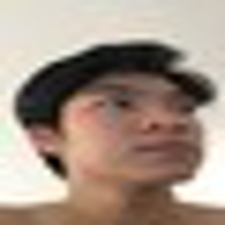

1/1 [==============================] - 0s 36ms/step
['thai']


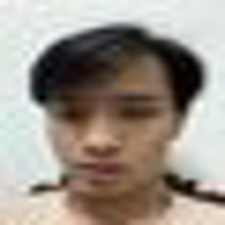

1/1 [==============================] - 0s 26ms/step
['long']


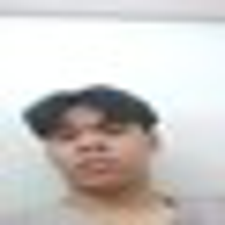

1/1 [==============================] - 0s 26ms/step
['fong']


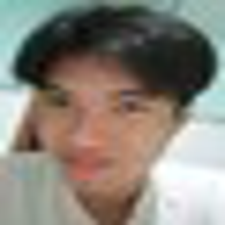

1/1 [==============================] - 0s 24ms/step
['tung']


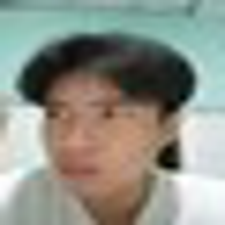

1/1 [==============================] - 0s 26ms/step
['tung']


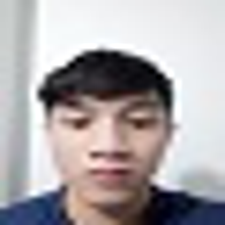

1/1 [==============================] - 0s 24ms/step
['huy']


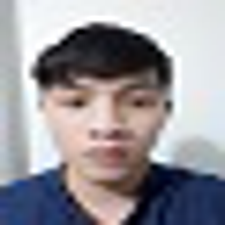

1/1 [==============================] - 0s 23ms/step
['huy']


In [ ]:
from PIL import Image
import numpy as np
import os
#Tạo mảng để chứa label
label = np.array(['fong', 'ha', 'hau', 'huy', 'kiet', 'long','luan', 'phuc', 'thai', 'tung'])

# Kích thước mới của ảnh
new_size = (225, 225)
predict_size = (40, 40)

# Đường dẫn đến thư mục chứa ảnh trong Drive
path = '/content/drive/MyDrive/SHARE/Colab Notebooks/Data/Face/CHECK/'
images = os.listdir(path)

# Đọc ảnh từ thư mục trên Drive và hiển thị chúng trên Colab
for image_name in images:
    # Đường dẫn đến file ảnh
    img_path = os.path.join(path, image_name)
    # Đọc ảnh
    if os.path.isfile(img_path):
      # Đọc ảnh
      img = Image.open(img_path)
      img_origin = Image.open(img_path)

      # Resize ảnh về kích thước mới
      img_origin = img.resize(new_size)
      img_origin.show()

      #Dự đoán
      img = img.resize(predict_size)
      img = img_to_array(img)
      img = img.reshape(1,40,40,3)
      img = img.astype('float32')/255
      max = np.argmax(model.predict(img), axis = 1)
      print(label[max])